## Exercício 2
Isabella Nascimento 

Acesse o seguinte dataset do kaggle https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?datasetId=251sortBy=voteCount

Os dados contêm informações sobre o desempenho de estudantes do ensino médio nos cursos de português e matemática. Aqui, o nosso foco não será na previsão em si, mas na utilização de modelos lineares ( e interpretáveis) para determinação dos principais condicionantes do desempenho acadêmico. Em especial, estamos interessados em determinar os impactos do consumo de álcool sobre as notas.
Mais uma vez, foque na utilização de modelos lineares, como regressões regular- izadas, vistas até aqui no curso.
Nota: ignore as variáveis G1 e G2. Elas são muito correlacionadas com G3, nossa variável resposta, e sua utilização atrapalharia a identificação dos impactos de interesse.
Mais especificamente, construa um notebook que percorra as seguintes etapas:

* Percorra as etapas usuais de análise exploratória e preparação dos dados. Nesse sentido, avalie e, se necessário, trate a presença de outliers, missing values, observações repetidas e outras questões que possam afetar o aprendizado dos modelos. Justifique todas suas escolhas
* Quais são os principais determinantes para a nota observada? Avalie e interprete os impactos quantitativos das principais variáveis.
* Foque agora na avaliação dos impactos do consumo do álcool sobre o desempenho dos alunos. Quais modificações no seu conjunto de dados você propõe para mel- horar essa identificação? E, utilizando tais estratégias, qual a sua avaliação acerca desses impactos?

# Resolução:
    1. data: rodando os pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import skew
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
  
import plotly.express as px

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Upload de base de dados: 
df2 = pd.read_csv('/Users/isabellanascimento/Documents/FGV -RI/Lista1/archive/student-mat.csv')
df3 = pd.read_csv('/Users/isabellanascimento/Documents/FGV -RI/Lista1/archive/student-por.csv')

In [3]:
#tropando as duas colunas "G1" e "G2", conforme o enunciado
df2 = df2.drop(columns=['G1','G2'])
df3 = df3.drop(columns=['G1','G2'])

In [4]:
#divisão por treino e teste para a primeira base (df2):
df2_train, df2_test = train_test_split(df2, test_size=0.3)

In [5]:
#divisão por treino e teste para a segunda base (df3):
df3_train, df3_test = train_test_split(df3, test_size=0.3)

In [6]:
#(por questões de organização, já vou deixar aqui a definição das variáveis X e Y para treino e teste em df2 e df3 aqui):
ft = ['school','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob',
                 'traveltime','studytime','failures','schoolsup','famsup','paid',
                 'activities','nursery','higher','internet','romantic','famrel','freetime',
                 'goout','Dalc','Walc','health']

df2_X_train = df2_train[ft]
df2_X_test = df2_test[ft]
df2_Y_train = (df2_train['G3']  -df2_train['G3'] .mean())/df2_train['G3'] .std()
df2_Y_test = (df2_test['G3']  -df2_test['G3'] .mean())/df2_test['G3'] .std()

df3_X_train = df3_train[ft]
df3_X_test = df3_test[ft]
df3_Y_train = (df3_train['G3']  -df3_train['G3'] .mean())/df3_train['G3'] .std()
df3_Y_test = (df3_test['G3']  -df3_test['G3'] .mean())/df3_test['G3'] .std()

In [7]:
df2_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,yes,no,5,3,5,1,1,3,0,8
305,GP,F,18,U,GT3,T,2,4,services,at_home,...,yes,no,4,4,3,1,1,3,8,12
156,GP,M,17,R,LE3,T,1,2,other,other,...,no,no,2,2,2,3,3,5,8,13
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,yes,yes,4,3,5,1,1,3,0,0
323,GP,F,17,U,GT3,T,3,1,services,services,...,yes,no,3,4,3,2,3,5,1,15


In [8]:
df3_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
224,GP,F,19,U,GT3,T,3,3,other,other,...,yes,no,4,3,3,1,2,3,4,12
443,MS,M,15,R,LE3,T,4,1,health,services,...,yes,no,5,3,4,1,2,2,7,8
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,yes,no,5,4,3,1,1,4,0,14
46,GP,F,16,U,LE3,A,3,3,other,services,...,yes,no,2,3,5,1,4,3,6,13
497,MS,M,17,U,GT3,T,3,3,services,at_home,...,no,no,5,4,5,3,4,5,0,10


In [9]:
#Agora vou analisar cada uma das bases de dados:
df2_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
179,GP,M,17,U,GT3,T,4,3,other,other,...,yes,yes,5,2,3,1,1,2,4,11
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,yes,no,4,2,4,2,3,2,24,18
186,GP,M,16,U,GT3,T,1,2,services,services,...,yes,yes,3,3,3,1,2,3,2,11
237,GP,F,16,U,GT3,T,2,1,other,other,...,yes,yes,4,5,2,1,1,5,20,12
152,GP,F,15,R,GT3,T,3,3,services,services,...,yes,yes,4,2,1,2,3,3,8,10


In [10]:
df3_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
409,GP,M,18,U,LE3,A,3,4,other,other,...,yes,yes,4,3,5,1,4,2,9,15
138,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,no,yes,5,3,3,1,1,5,2,11
272,GP,M,17,R,GT3,T,1,1,other,other,...,yes,yes,4,3,3,1,1,1,2,15
582,MS,F,19,U,LE3,A,1,1,at_home,other,...,no,no,1,4,4,1,1,5,0,7
220,GP,F,16,U,GT3,A,3,1,services,other,...,yes,no,2,3,3,2,2,4,2,12


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [13]:
#Análise para missing data - matemática:
total = df2_train.isnull().sum().sort_values(ascending=False)
percent = (df2_train.isnull().sum()/df2_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#não tem missing data

,Total,Percent
school,0,0.0
famsup,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0
famrel,0,0.0
romantic,0,0.0


In [14]:
#Análise para missing data - portugues:
total = df3_train.isnull().sum().sort_values(ascending=False)
percent = (df3_train.isnull().sum()/df3_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#não tem missing data

,Total,Percent
school,0,0.0
famsup,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0
famrel,0,0.0
romantic,0,0.0


In [15]:
#Análise para variáveis duplicadas:
print(df2_train.duplicated().sum())
print(df3_train.duplicated().sum())
#Não temos variáveis duplicadas

0
0


# Análise da distribuição - variável dependente (G3)

/Users/isabellanascimento/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

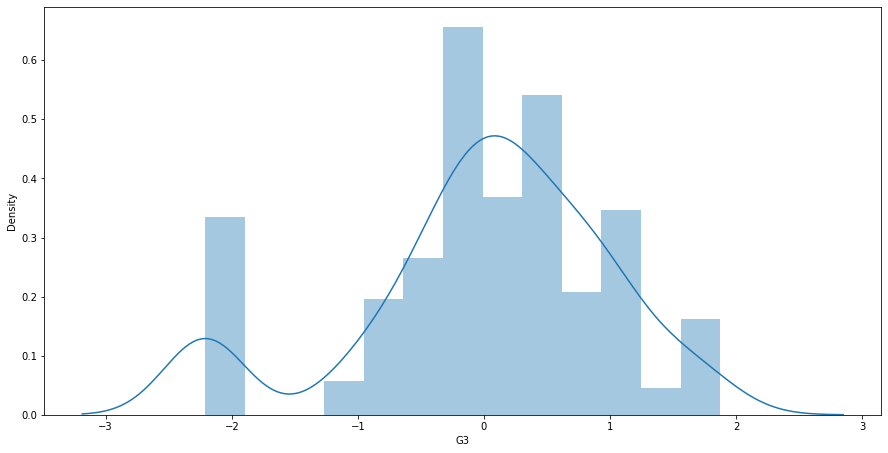

In [16]:
#Para matemática:
plt.figure(figsize=(15, 7.5))
sns.distplot(df2_Y_train)


In [17]:
#Uma possibilidade de normalização (abaixo, farei melhor com trimming)
#vou deixar em comentário para não alterar os valores de média e desvio padrão agora
#df2_train['G3'] = (df2_train['G3']  - df2_train['G3'] .mean())/df2_train['G3'] .std()
#df2_test['G3'] = (df2_test['G3']  -df2_test['G3'] .mean())/df2_test['G3'] .std()


/Users/isabellanascimento/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

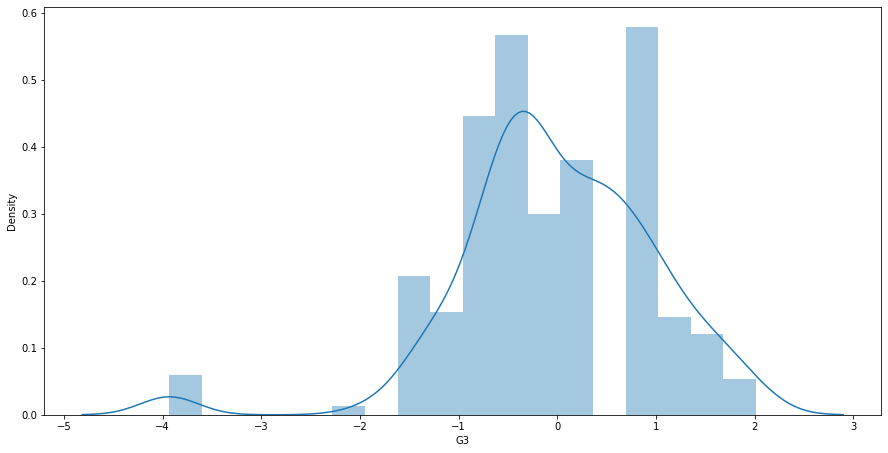

In [18]:
#Para português:
plt.figure(figsize=(15, 7.5))
sns.distplot(df3_Y_train)

In [19]:
#outra possibilidade de normalizaçao:
#vou deixar em comentário para não alterar os proximos passos
#e abaixo, farei melhor com trimming
#df3_train['G3'] = (df3_train['G3']  - df3_train['G3'] .mean())/df3_train['G3'] .std()
#df3_test['G3'] = (df3_test['G3']  -df3_test['G3'] .mean())/df3_test['G3'] .std()


In [20]:
#df2_train_std = df2_train.std()
#df3_train_std = df3_train.std()
#df2_train_mean = df2_train.mean()
#df3_train_mean = df3_train.mean()

Tratamento de Outliers: aqui, vou usar Data trimming é o processo de remover ou excluir valores extremos, ou outliers, de um conjunto de dados.

In [21]:
#Vamos começar com o data trimming para a nossa variável de interesse "G3" para matemática:
df2_Y_train = pd.DataFrame (df2_Y_train, columns = ['G3'])

limite_sup = df2_Y_train['G3'].mean() + 3*df2_Y_train['G3'].std()
limite_inf = df2_Y_train['G3'].mean() - 2*df2_Y_train['G3'].std()

print("Maior possível", limite_sup)
print("Menor possível", limite_inf)

Maior possível 3.0000000000000013
Menor possível -2.000000000000001


In [22]:
df2_Y_train_trimmed = df2_Y_train[( df2_Y_train['G3'] < limite_sup ) &  ( df2_Y_train['G3'] > limite_inf ) ]

In [23]:
df2_Y_train.shape

(276, 1)

In [24]:
df2_Y_train_trimmed.shape # Removemos 24 observações

(247, 1)

/Users/isabellanascimento/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

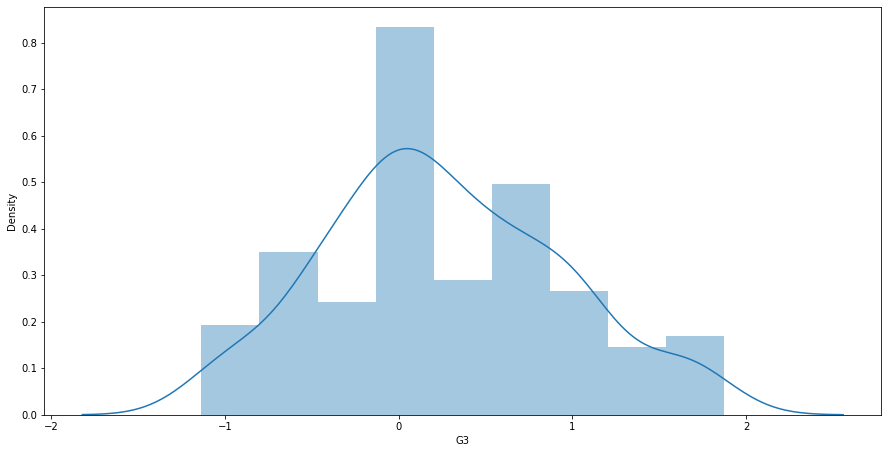

In [25]:
#agora checamos a distribuição:

plt.figure(figsize=(15, 7.5))
sns.distplot(df2_Y_train_trimmed['G3'])

Deu certo, normalizamos! :)

In [26]:
#E agora fazwemos o trimming para a nossa variável de interesse "G3" para português:
df3_Y_train = pd.DataFrame (df3_Y_train, columns = ['G3'])

limite_sup = df3_Y_train['G3'].mean() + 3*df3_Y_train['G3'].std()
limite_inf = df3_Y_train['G3'].mean() - 2*df3_Y_train['G3'].std()

print("Maior possível", limite_sup)
print("Menor possível", limite_inf)

Maior possível 2.999999999999999
Menor possível -1.9999999999999998


In [27]:
df3_Y_train_trimmed = df3_Y_train[( df3_Y_train['G3'] < limite_sup ) &  ( df3_Y_train['G3'] > limite_inf ) ]

In [28]:
df3_Y_train.shape

(454, 1)

In [29]:
df3_Y_train_trimmed.shape #removemos 11 observações

(445, 1)

/Users/isabellanascimento/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

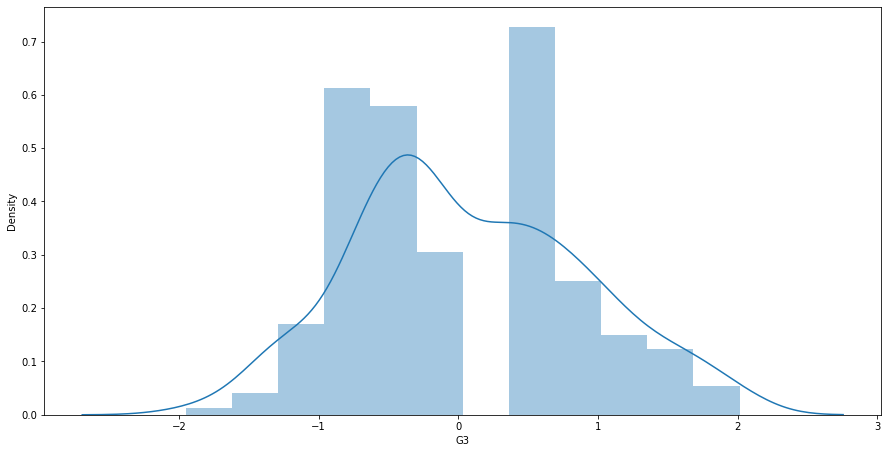

In [30]:
#agora checamos a distribuição:

plt.figure(figsize=(15, 7.5))
sns.distplot(df3_Y_train_trimmed['G3'])

Melhoramos a distribuição aqui também.

# Encoding

In [31]:
df2_train.select_dtypes(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
179,GP,M,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,yes
198,GP,F,U,GT3,T,services,teacher,home,mother,no,yes,no,no,yes,yes,yes,no
186,GP,M,U,GT3,T,services,services,other,mother,no,yes,yes,yes,yes,yes,yes,yes
237,GP,F,U,GT3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,yes
152,GP,F,R,GT3,T,services,services,reputation,other,no,yes,yes,yes,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,GP,F,U,LE3,T,at_home,other,course,mother,no,yes,no,no,yes,yes,no,no
268,GP,M,U,GT3,T,health,other,reputation,father,no,yes,yes,yes,yes,yes,yes,yes
73,GP,M,U,GT3,T,other,other,reputation,mother,no,no,no,yes,yes,yes,no,no
231,GP,M,R,GT3,T,other,other,course,father,no,yes,yes,yes,yes,yes,yes,no


In [32]:
df3_train.select_dtypes(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
224,GP,F,U,GT3,T,other,other,reputation,other,no,yes,no,yes,yes,yes,yes,no
443,MS,M,R,LE3,T,health,services,reputation,father,no,yes,no,yes,yes,yes,yes,no
36,GP,M,U,LE3,T,teacher,services,home,mother,no,yes,no,yes,yes,yes,yes,no
46,GP,F,U,LE3,A,other,services,home,mother,no,yes,no,no,yes,yes,yes,no
497,MS,M,U,GT3,T,services,at_home,course,mother,no,yes,yes,yes,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,MS,F,U,GT3,T,at_home,other,home,mother,yes,yes,no,no,no,yes,yes,no
9,GP,M,U,GT3,T,other,other,home,mother,no,yes,no,yes,yes,yes,yes,no
547,MS,M,R,LE3,T,other,at_home,other,father,no,no,no,no,yes,yes,yes,no
242,GP,M,U,LE3,T,at_home,other,course,mother,yes,yes,no,yes,yes,yes,yes,yes


In [33]:
#Imagino que gênero seja a variável mais interessante para fazer um encoding básico, então segue:
df2.sex = df2.replace(
    {"sex": {"F": 0, 
             "M": 1 }}                
                  ).sex  

In [34]:
df3.sex = df3.replace(
    {"sex": {"F": 0, 
             "M": 1 }}                
                  ).sex  

In [35]:
#Para facilitar a vida, vou fazer get all dummies pro resto:
#Encoding - mat
df2_X_train = pd.get_dummies(df2_X_train)
df2_X_test = pd.get_dummies(df2_X_test)

#Encoding - port
df3_X_train = pd.get_dummies(df3_X_train)
df3_X_test = pd.get_dummies(df3_X_test)

# Agora, começamos as análises:

In [36]:
def mape(Y_actual, Y_Predicted):
    mape = np.mean(np.abs( Y_actual - Y_Predicted)/Y_actual)*100
    mape = round(mape, 2)
    return mape

#def rmse(Y_actual, Y_Predicted):
 #   rmse = np.mean( (Y_actual - Y_Predicted)**2 /Y_actual )*100
  #  rmse = round(rmse, 2)
   # return rmse   

#def mpe(Y_actual, Y_Predicted):
 #   mpe = np.mean((Y_actual - Y_Predicted)/Y_actual)*100
  #  mpe = round(mpe, 2)
   # return mpe

# Quais são os principais determinantes para as notas de português e matemática?

## foco: impactos do consumo do álcool sobre o desempenho dos alunos

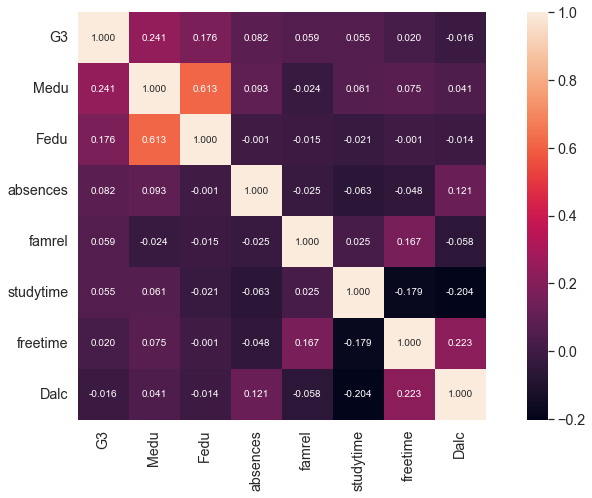

In [52]:
#Primeiro, quero analisar os dados de MATEMATICA:

#aqui quero fazer uma matriz de correlação para entender os principais fatores que influenciam a nota de matemática
#vou utilizar daqui em diante apenas a base train
corrmat = df2_train.corr()
k = 8
cols = corrmat.nlargest(k, 'G3')['G3'].index
cm = np.corrcoef(df2_train[cols].values.T)
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Aqui já entendemos que "Medu", "Fedu", "studytime", "famrel", "absences", "freetime", "Dalc" 
#tem uma alta correlação com as notas finais, sendo algumas das principais determinantes para as notas de matemática

In [38]:
#OLS - para matemática, onde:
#Variável dependente: G3
#Variável independente: todas as covariadas
linear_reg = sm.OLS(df2_Y_train, df2_X_train)
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df2_X_test)
print(linear_reg_fit.summary())

print('Mape')
print( mape( df2_Y_test, np.exp(linear_reg_pred)) )

#aqui, conseguimos ver as variáveis de maior interferência em G3

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     3.006
Date:                Sun, 15 May 2022   Prob (F-statistic):           8.15e-07
Time:                        21:29:07   Log-Likelihood:                -345.10
No. Observations:                 276   AIC:                             756.2
Df Residuals:                     243   BIC:                             875.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Medu               0.1742      0.083      2.

In [39]:
#OLS - para matemática, onde:
#Variável Dependente: Nota Final
#Variáveis independentes: Medu, Fedu

linear_reg = sm.OLS(df2_Y_train, df2_X_train[['Medu', 'Fedu']] )
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df2_X_test[['Medu','Fedu']])
print(linear_reg_fit.summary())

#Em termos percentuais, 0.005 significaria que nosso modelo explica 0.9% da mudança em nossa variável ‘G3’.

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.187
Date:                Sun, 15 May 2022   Prob (F-statistic):                       0.307
Time:                        21:29:07   Log-Likelihood:                         -389.94
No. Observations:                 276   AIC:                                      783.9
Df Residuals:                     274   BIC:                                      791.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
#OLS - para matemática, onde:
#Variável Dependente: Nota Final
#Variáveis independentes: studytime 

linear_reg = sm.OLS(df2_Y_train, df2_X_train[['studytime','freetime']] )
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df2_X_test[['studytime','freetime']])
print(linear_reg_fit.summary())
# O modelo explica 0.1% da mudança da variável ‘G3’.

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.1473
Date:                Sun, 15 May 2022   Prob (F-statistic):                       0.863
Time:                        21:29:07   Log-Likelihood:                         -390.98
No. Observations:                 276   AIC:                                      786.0
Df Residuals:                     274   BIC:                                      793.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

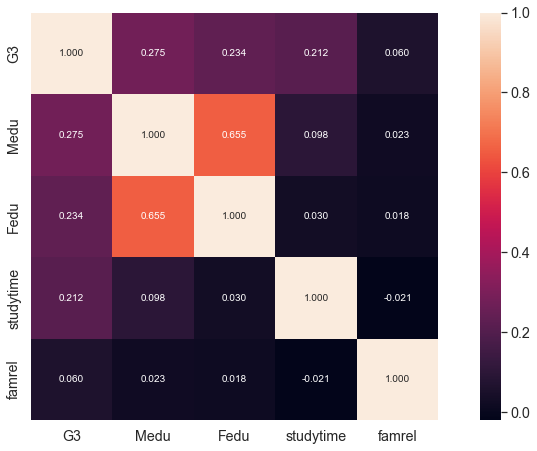

In [41]:
#Segundo, vou focar nos dados de PORTUGUES:

#aqui, quero fazer uma matriz de correlação para entender os principais fatores que influenciam a nota de português
corrmat = df3_train.corr()
k = 5
cols = corrmat.nlargest(k, 'G3')['G3'].index
cm = np.corrcoef(df3_train[cols].values.T)
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#Descobrimos que "Medu", "studytime", "Farmrel e "Fedu" tem as maiores correlações com as notas nesse caso

In [42]:
#OLS - para português, onde:
#Variável dependente: G3
#Variável independente: todas as covariadas
linear_reg = sm.OLS(df3_Y_train, df3_X_train)
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df3_X_test)
print(linear_reg_fit.summary())

print('Mape')
print( mape( df3_Y_test, np.exp(linear_reg_pred)) )

#aqui, conseguimos ver as variáveis de maior interferência em G3

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     7.424
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.05e-25
Time:                        21:29:07   Log-Likelihood:                -542.13
No. Observations:                 454   AIC:                             1150.
Df Residuals:                     421   BIC:                             1286.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Medu              -0.0064      0.058     -0.

In [43]:
#OLS - para português, onde:
#Variável Dependente: Nota Final
#Variável independente: studytime

linear_reg = sm.OLS(df3_Y_train, df3_X_train[['studytime']] )
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df3_X_test[['studytime']])
print(linear_reg_fit.summary())

#Uma variação de 0,7% na nota final de português pode ser explicada pela quantidade de estudo.

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              3.336
Date:                Sun, 15 May 2022   Prob (F-statistic):                      0.0685
Time:                        21:29:07   Log-Likelihood:                         -642.03
No. Observations:                 454   AIC:                                      1286.
Df Residuals:                     453   BIC:                                      1290.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
#OLS - para português - foco: questões familiares
#onde:
#Variável Dependente: Nota Final
#Variável independente: Fedu, Medu, famrel

linear_reg = sm.OLS(df3_Y_train, df3_X_train[['Fedu','Medu','famrel']] )
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df3_X_test[['Fedu','Medu','famrel']])
print(linear_reg_fit.summary())

#resultado: 5% nota de portugues pode também ser explicada por variaveis familiares

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.049
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              7.748
Date:                Sun, 15 May 2022   Prob (F-statistic):                    4.68e-05
Time:                        21:29:07   Log-Likelihood:                         -632.29
No. Observations:                 454   AIC:                                      1271.
Df Residuals:                     451   BIC:                                      1283.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Impacto do consumo de alcool no desempenho - box plots:


Text(0.5, 1.0, 'Alcool nos finais de semana e notas de matemática')

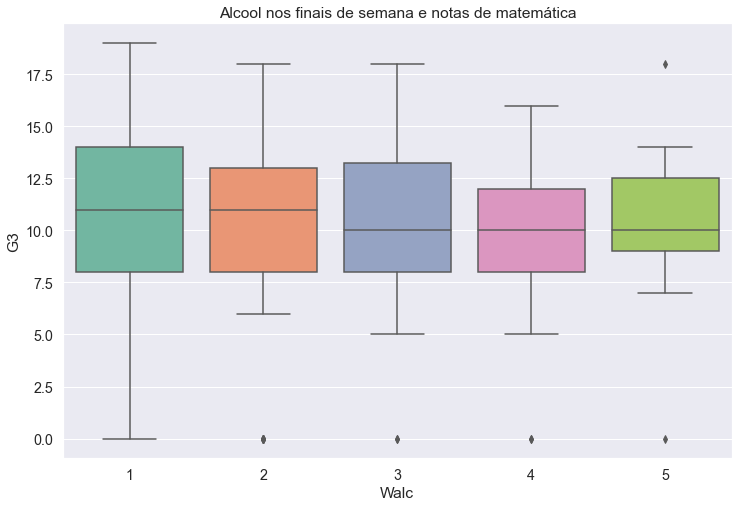

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Walc',y='G3',data=df2_train, palette='Set2')
plt.title("Alcool nos finais de semana e notas de matemática")

Text(0.5, 1.0, 'Alcool nos finais de semana e notas de Português')

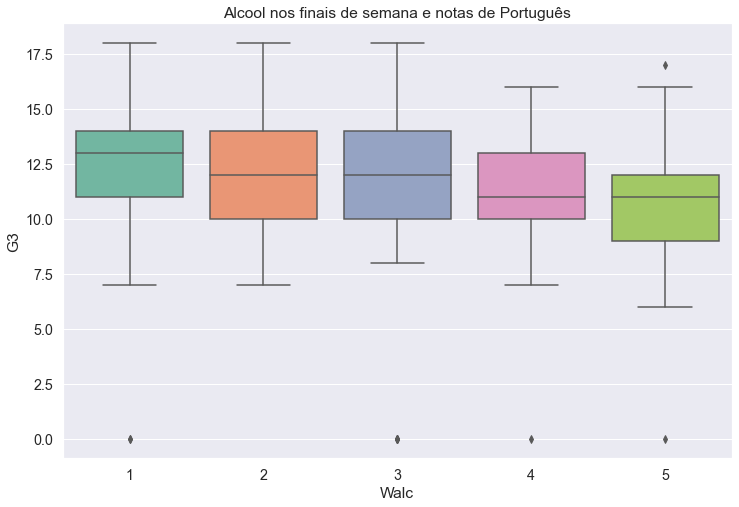

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Walc',y='G3',data=df3_train, palette='Set2')
plt.title("Alcool nos finais de semana e notas de Português")

### Estas visualizações aparentam que o consumo de alcool aos finais de semana impactam pouco as notas de português e matemática.

Text(0.5, 1.0, 'Alcool durante a semana e notas de matemática')

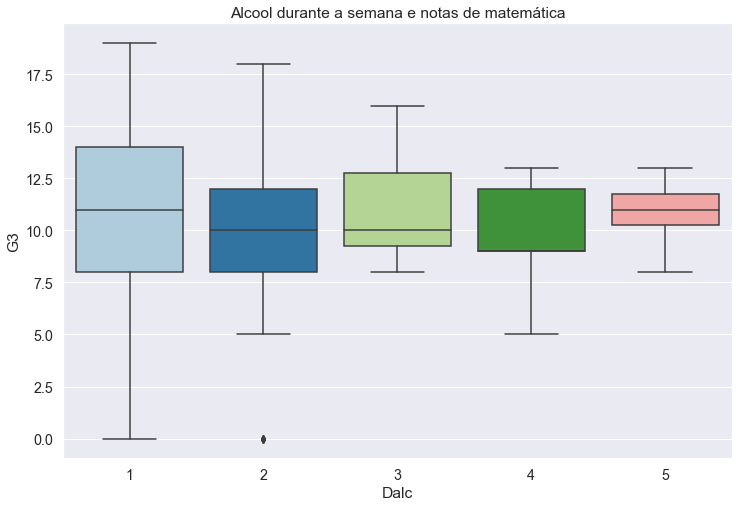

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Dalc',y='G3',data=df2_train, palette='Paired')
plt.title("Alcool durante a semana e notas de matemática")

Text(0.5, 1.0, 'Alcool durante a semana e notas de português')

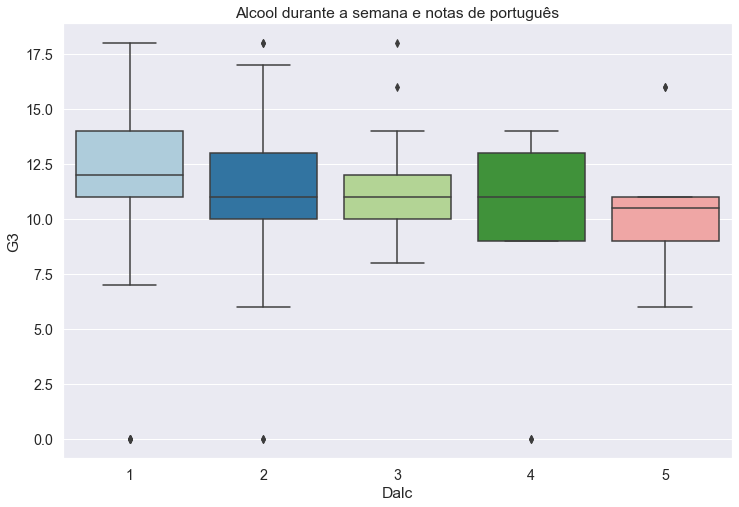

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Dalc',y='G3',data=df3_train, palette='Paired')
plt.title("Alcool durante a semana e notas de português")


### Diferentemente, o consumo de alcool frequente durante a semana aparenta impactar mais as notas.

### Para checar, utilize um modelo de OLS simples abaixo:

In [54]:
#OLS - para matemática, onde:
#Variável Dependente: Nota Final
#Variável independente: Consumo de álcool durante a semana e aos finais de semana

linear_reg = sm.OLS(df2_Y_train, df2_X_train[['Dalc','Walc']] )
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df2_X_test[['Dalc','Walc']])
print(linear_reg_fit.summary())

#Segundo esses resultados, pouco da variação em G3 pode ser explicada pelo consumo de alcool.


                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                            0.01910
Date:                Sun, 15 May 2022   Prob (F-statistic):                       0.890
Time:                        21:32:18   Log-Likelihood:                         -391.12
No. Observations:                 276   AIC:                                      784.2
Df Residuals:                     275   BIC:                                      787.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
#OLS - para português, onde:
#Variável Dependente: Nota Final
#Variável independente: Consumo de álcool durante a semana e aos finais de semana

linear_reg = sm.OLS(df3_Y_train, df3_X_train[['Dalc', 'Walc']] )
linear_reg_fit  = linear_reg.fit()
linear_reg_pred = linear_reg_fit.predict(df3_X_test[['Dalc','Walc']])
print(linear_reg_fit.summary())

#o consumo de alcool influencia a nota de português mais do que influencia a nota de matemática.

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              1.922
Date:                Sun, 15 May 2022   Prob (F-statistic):                       0.147
Time:                        21:29:08   Log-Likelihood:                         -641.77
No. Observations:                 454   AIC:                                      1288.
Df Residuals:                     452   BIC:                                      1296.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Próximos passos contariam com a utilização dos modelos de ridge e lasso; além de iniciar a análise de random forest para fazer previsões.

Em https://www.kaggle.com/code/mohaiminul101/student-grade-prediction-and-eda, conseguimos ter uma boa ideia para próximos passos. No entanto, não abordarei essa parte da análise nesta lista.
    